# 01 - Linear Regression

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

Hyper Parameters

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

Toy Dataset

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                   [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
[3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

Linear Regression Model

In [4]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
model = LinearRegression(input_size, output_size)

Loss and optimizer

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train the Model

In [7]:
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    #Forward + Backward + Optimize
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch [%d/%d], Loss: %.4f'
              %(epoch+1, num_epochs, loss.data[0]))
        

Epoch [5/60], Loss: 1.1962
Epoch [10/60], Loss: 0.5885
Epoch [15/60], Loss: 0.3423
Epoch [20/60], Loss: 0.2425
Epoch [25/60], Loss: 0.2021
Epoch [30/60], Loss: 0.1857
Epoch [35/60], Loss: 0.1791
Epoch [40/60], Loss: 0.1764
Epoch [45/60], Loss: 0.1753
Epoch [50/60], Loss: 0.1748
Epoch [55/60], Loss: 0.1746
Epoch [60/60], Loss: 0.1746


Plot the graph

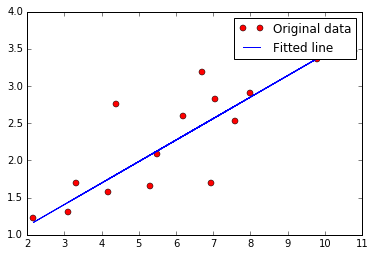

In [8]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

Save the Model

In [18]:
torch.save(model.state_dict(), 'LinRegModel.pkl')